# AJUSTES PENDIENTES
1. Reorganizar los graficos para que esten todos juntos
2. Hacer que los indices de los dfs se correspondan con los valores de k


# Mejor combinaci\'on $k, \alpha$

En \'esta seccion hallaremos la combinacion \'optima de par\'ametros $k$ y $\alpha$ correspondientes a los algoritmos KNN y PCA respectivamente. Para ello creamos 2 scripts: classifiers.py y best_k_alpha.py, donde el primero se encarga de tomar el dataframe y dos instancias de los parametros y realiza un 'diagnostico' del rendimiento del modelo haciendo un split 80/20 de entrenamiento y el segundo se encarga de probar con todas las combinaciones posibles para $k$ en [1,3,5,...,49] y $\alpha$ en [1,3,5,...,49]. Se guardan los resultados para cada metrica en un CSV distinto (por ejemplo, en accuracy.csv se guarda un dataframe que muestra en la posicion $i,j$ el accuracy para $k=i$ y $\alpha = j$).  
Es de esperar que a mayor $\alpha$, mayor es el tiempo que tarda el algoritmo en entrenarse. Es por ello que primero seleccionaremos un $\alpha$ a partir del cual las metricas no mejoren considerablemente, manteniendo un tiempo de ejecucion considerablemente mejor que entrenar el modelo en dimensiones superiores.



## Resultados

In [1]:
import pandas as pd
import numpy as np

In [2]:
acc = pd.read_csv("./accuracy.csv").drop(columns=["idx"])
prec = pd.read_csv("precision.csv").drop(columns=["idx"])
rec = pd.read_csv("recall.csv").drop(columns=["idx"])
f1 = pd.read_csv("f1.csv").drop(columns=["idx"])
time = pd.read_csv("time.csv").drop(columns=["idx"])

In [3]:
xticks = np.arange(1,49,2)

In [8]:
acc


,alpha = 1,alpha = 3,alpha = 5,alpha = 7,alpha = 9,alpha = 11,alpha = 13,alpha = 15,alpha = 17,alpha = 19,...,alpha = 31,alpha = 33,alpha = 35,alpha = 37,alpha = 39,alpha = 41,alpha = 43,alpha = 45,alpha = 47,alpha = 49
0,0.223867,0.566467,0.696000,0.739333,0.775600,0.793133,0.803667,0.809933,0.818867,0.824467,...,0.837000,0.842933,0.839200,0.838533,0.842267,0.838067,0.836733,0.844267,0.843867,0.844200
1,0.228533,0.604667,0.728400,0.765000,0.799000,0.808933,0.821000,0.824400,0.836067,0.839600,...,0.850733,0.849200,0.850200,0.848867,0.852467,0.852200,0.851667,0.848467,0.853533,0.852533
2,0.240467,0.619133,0.737067,0.782867,0.808600,0.822867,0.826600,0.832733,0.839267,0.841067,...,0.853600,0.851733,0.850000,0.852467,0.857200,0.856867,0.852200,0.862200,0.861333,0.857000
3,0.248933,0.635800,0.739133,0.784667,0.806133,0.825200,0.832067,0.833600,0.845533,0.840667,...,0.851000,0.851600,0.858933,0.852067,0.852267,0.854000,0.849333,0.858867,0.859933,0.858867
4,0.259200,0.635267,0.744200,0.785200,0.807933,0.820267,0.829733,0.832467,0.838267,0.848133,...,0.851067,0.851400,0.850467,0.852600,0.853600,0.856000,0.855400,0.857133,0.858333,0.858667
5,0.262467,0.647600,0.756400,0.785467,0.807333,0.813867,0.828667,0.838667,0.838867,0.843067,...,0.851867,0.851333,0.854600,0.855133,0.855800,0.853400,0.856000,0.858467,0.855800,0.857133
6,0.263067,0.641000,0.748133,0.790400,0.806733,0.821933,0.827667,0.837133,0.844333,0.844267,...,0.853133,0.852467,0.855533,0.850200,0.855333,0.855667,0.853400,0.853867,0.854867,0.853067
7,0.271000,0.643600,0.752133,0.790333,0.809067,0.821400,0.828667,0.837333,0.839800,0.845200,...,0.847733,0.853267,0.850733,0.851333,0.850200,0.852800,0.856600,0.852800,0.854333,0.852933
8,0.273533,0.650400,0.749600,0.782200,0.809400,0.820200,0.832267,0.835667,0.843533,0.840133,...,0.854867,0.849400,0.847333,0.851733,0.855400,0.851600,0.855400,0.849000,0.850600,0.854867
9,0.268733,0.652733,0.755200,0.787600,0.805467,0.826600,0.829000,0.835800,0.834267,0.841533,...,0.847000,0.854267,0.850867,0.851400,0.854333,0.851533,0.851533,0.850333,0.853133,0.852867


In [12]:
acc.columns = np.arange(1,50,2)
prec.columns = np.arange(1,50,2)
rec.columns = np.arange(1,50,2)
f1.columns = np.arange(1,50,2)
time.columns = np.arange(1,50,2)

In [18]:
Zacc

,3,5,7,9,11,13,15,17,19,21,...,31,33,35,37,39,41,43,45,47,49
1,0.604667,0.728400,0.765000,0.799000,0.808933,0.821000,0.824400,0.836067,0.839600,0.845000,...,0.850733,0.849200,0.850200,0.848867,0.852467,0.852200,0.851667,0.848467,0.853533,0.852533
2,0.619133,0.737067,0.782867,0.808600,0.822867,0.826600,0.832733,0.839267,0.841067,0.844533,...,0.853600,0.851733,0.850000,0.852467,0.857200,0.856867,0.852200,0.862200,0.861333,0.857000
3,0.635800,0.739133,0.784667,0.806133,0.825200,0.832067,0.833600,0.845533,0.840667,0.843133,...,0.851000,0.851600,0.858933,0.852067,0.852267,0.854000,0.849333,0.858867,0.859933,0.858867
4,0.635267,0.744200,0.785200,0.807933,0.820267,0.829733,0.832467,0.838267,0.848133,0.852133,...,0.851067,0.851400,0.850467,0.852600,0.853600,0.856000,0.855400,0.857133,0.858333,0.858667
5,0.647600,0.756400,0.785467,0.807333,0.813867,0.828667,0.838667,0.838867,0.843067,0.846533,...,0.851867,0.851333,0.854600,0.855133,0.855800,0.853400,0.856000,0.858467,0.855800,0.857133
6,0.641000,0.748133,0.790400,0.806733,0.821933,0.827667,0.837133,0.844333,0.844267,0.848467,...,0.853133,0.852467,0.855533,0.850200,0.855333,0.855667,0.853400,0.853867,0.854867,0.853067
7,0.643600,0.752133,0.790333,0.809067,0.821400,0.828667,0.837333,0.839800,0.845200,0.844600,...,0.847733,0.853267,0.850733,0.851333,0.850200,0.852800,0.856600,0.852800,0.854333,0.852933
8,0.650400,0.749600,0.782200,0.809400,0.820200,0.832267,0.835667,0.843533,0.840133,0.848000,...,0.854867,0.849400,0.847333,0.851733,0.855400,0.851600,0.855400,0.849000,0.850600,0.854867
9,0.652733,0.755200,0.787600,0.805467,0.826600,0.829000,0.835800,0.834267,0.841533,0.844533,...,0.847000,0.854267,0.850867,0.851400,0.854333,0.851533,0.851533,0.850333,0.853133,0.852867
10,0.648667,0.750533,0.785133,0.805733,0.819333,0.825467,0.833400,0.839933,0.841667,0.841400,...,0.844733,0.851667,0.851600,0.849133,0.845867,0.850533,0.852067,0.852067,0.853400,0.854200


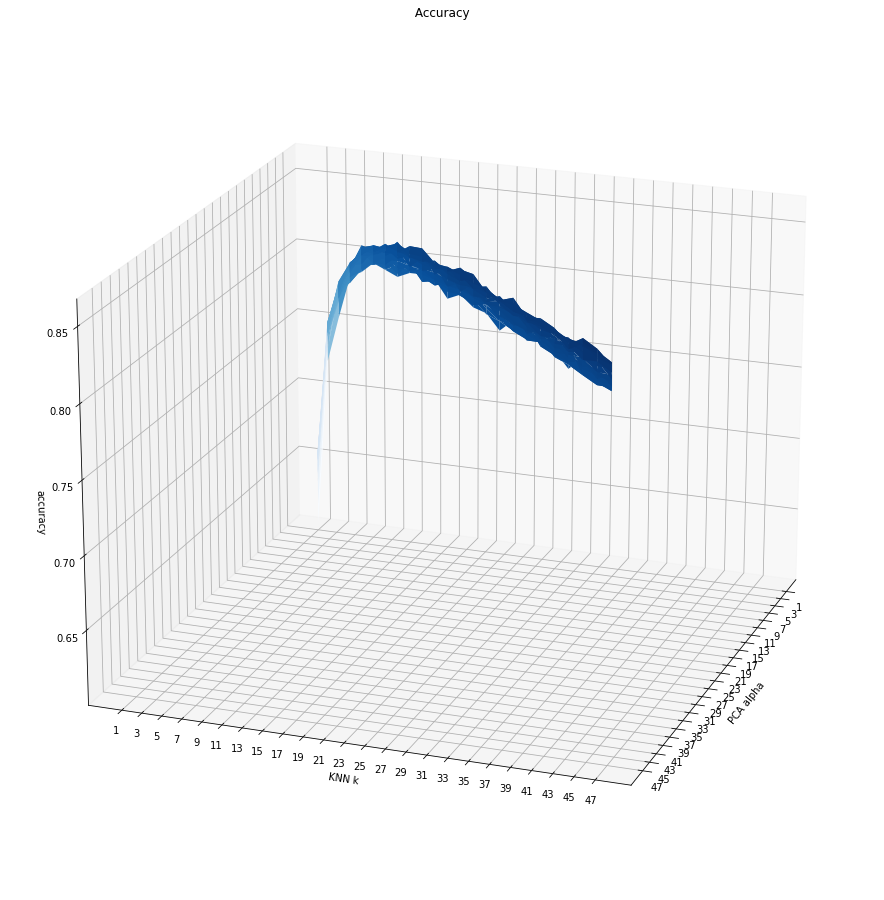

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

acc
x = np.arange(1,25,1)
y = np.arange(1,25,1)
Zacc = acc.iloc[x,y]
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PCA alpha")
ax.set_ylabel("KNN k")
ax.set_zlabel("accuracy")
ax.set_title(" Accuracy ")

# Plot a 3D surface
mycmap = plt.get_cmap('Blues')

ax.plot_surface(x,y,Zacc, cmap = mycmap)
ax.view_init(20, 20)
plt.xticks(x,xticks)
plt.yticks(x,xticks)
plt.savefig("acc_k_alpha")
plt.show()


In [ ]:
Zprec = prec.iloc[x,y]

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PCA alpha")
ax.set_ylabel("KNN k")
ax.set_zlabel("precision")
ax.set_title("Precision")


# Plot a 3D surface
mycmap = plt.get_cmap('Blues')

ax.plot_surface(X,Y,Zprec, cmap = mycmap)
ax.view_init(20, 20)
plt.xticks(x,xticks)
plt.yticks(x,xticks)
plt.savefig("prec_k_alpha")

plt.show()

In [ ]:
Zrec = rec.iloc[x,y]

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PCA alpha")
ax.set_ylabel("KNN k")
ax.set_zlabel("recall")
ax.set_title(" recall ")


# Plot a 3D surface
mycmap = plt.get_cmap('Blues')

ax.plot_surface(X,Y,Zrec, cmap = mycmap)
ax.view_init(20, 20)
plt.xticks(x,xticks)
plt.yticks(x,xticks)
plt.savefig("recall_k_alpha")

plt.show()

In [ ]:
Zf1 = f1.iloc[x,y]

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PCA alpha")
ax.set_ylabel("KNN k")
ax.set_zlabel("f1")
ax.set_title(" f1 ")


# Plot a 3D surface
mycmap = plt.get_cmap('Blues')

ax.plot_surface(X,Y,Zf1, cmap = mycmap)
ax.view_init(20, 20)
plt.xticks(x,xticks)
plt.yticks(x,xticks)
plt.savefig("f1_k_alpha")

plt.show()

In [ ]:
Ztime = time.iloc[x,y]

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PCA alpha")
ax.set_ylabel("KNN k")
ax.set_zlabel("tiempo (s)")
ax.set_title("Tiempo de ejecucion")


# Plot a 3D surface
mycmap = plt.get_cmap('Blues')

ax.plot_surface(X,Y,Ztime, cmap = mycmap)
ax.view_init(20, 100)
plt.xticks(x,xticks)
plt.yticks(x,xticks)
plt.savefig("time_k_alpha")

plt.show()

Observese que el gran salto se da de $\alpha$ 15 a 17. Notar tambien algo muy importante: k influye muy poco en el tiempo de ejecucion con respecto a $\alpha$. Podemos entonces encontrar el alfa menor o igual a 15 que da el mejor ratio tiempo de ejecucion/accuracy. 

In [ ]:
acc.max()

In [ ]:
acc.idxmax()

In [ ]:
acc["alpha = 15"]

In [ ]:
Tomaremos el maximo 

In [ ]:
acc

In [ ]:
time

## Eleccion de los parametros

Como mencionamos anteriormente, la importancia del acierto o no de una clasificacion es igual para todas las imagenes y ademas las clases de las muestras estan uniformemente distribuidas es por eso que nos basaremos en accuracy para elegir el mejor alfa (aunque a la luz de los datos el resto de las metricas que consideran el resultado de la prediccion varian de forma muy parecida al cambiar los parametros), y le daremos igual importancia al tiempo de ejecucion.

### Considerado todo lo dicho anteriormente, tomaremos $\alpha$=15 y $k$=15

## Proximo experimento: Otras formas de reduccion de dimensionalidad y transformacion de los datos

Posibilidades:  
tsne - sklearn.manifold: Manifold Learning? (explorar)  
lda  
autoencoders  
embeddings  